In [1]:
import scipy as sci
from scipy.special import factorial, assoc_laguerre, sph_harm
from scipy import constants
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold = np.inf)
from skimage import measure

In [2]:
def Psi(n, l, m, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan(y / x)
    
    cz1 = np.sqrt((2.0/n)**3 * factorial(n-l-1)/(2.0*n*factorial(n+l)))
    cz1 = cz1 * np.exp(-r/n) * (2.0*r/n)**l * assoc_laguerre(2.0*r/n, n-l-1, 2*l+1)
    
    cz2 = cz1 *  sph_harm(m, l, phi, theta)
    
    return cz2

In [83]:
u_lim = 10
b_lim = -10

xs = np.linspace(b_lim, u_lim, 100)
ys = np.linspace(b_lim, u_lim, 100)
zs = np.linspace(b_lim, u_lim, 100)
x, y, z = np.meshgrid(xs, ys, zs)

In [84]:
n = 4
l = 2
m = 0
prob = np.abs(Psi(n, l, m, x, y, z))**2

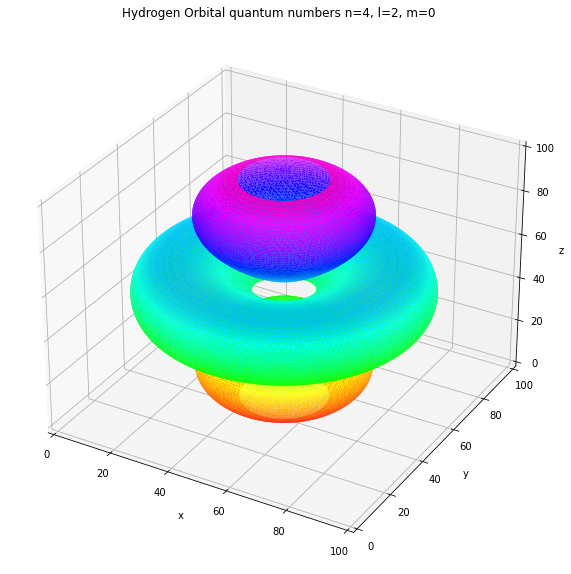

In [91]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


verts, faces, normals, values = measure.marching_cubes(prob, prob.mean())


ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='gist_rainbow')
ax.set_title(f'Hydrogen Orbital quantum numbers n={n}, l={l}, m={m}')
 
plt.show()

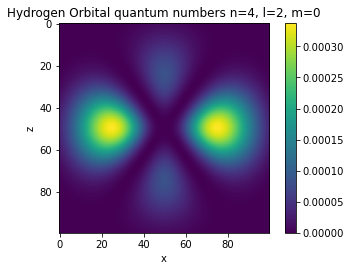

In [89]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(prob[int((0-b_lim)/((u_lim-b_lim)/len(xs))),:,:])
plt.colorbar()
ax.set_title(f'Hydrogen Orbital quantum numbers n={n}, l={l}, m={m}')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

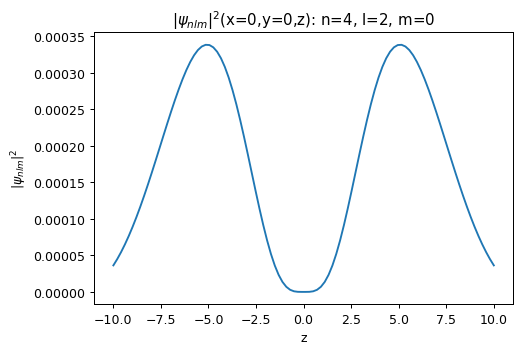

In [87]:
fig, ax = plt.subplots(dpi=90)
ax.plot(zs, prob[int(len(zs)/2),int(len(zs)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()